# Data Preprocessing

## Download & export data tables

### Download Microsoft OHLCV with `yfinance` library

In [58]:
import yfinance as yf

In [59]:
ticker = 'MSFT'
df_MSFT = yf.download(ticker, multi_level_index=False, auto_adjust=False)
df_MSFT

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
...,...,...,...,...,...,...
2023-05-10,308.619995,313.000000,307.670013,312.309998,312.309998,30078000
2023-05-11,310.100006,311.119995,306.260010,310.109985,310.109985,31663200


### Download any ticker

**Search for the ticker code**

YFinance: https://finance.yahoo.com/

- [x] Microsoft: MSFT
- [ ] Bitcoin: ???

In [63]:
ticker = 'BTC-USD'
df_BTC = yf.download(ticker, multi_level_index=False, auto_adjust=False)
df_BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
...,...,...,...,...,...,...
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26990.148438,27054.158203,26178.617188,26290.275391,26290.275391,19155535872


## Visualize the data with plotly

https://plotly.com/python/candlestick-charts/

In [64]:
import plotly.graph_objects as go

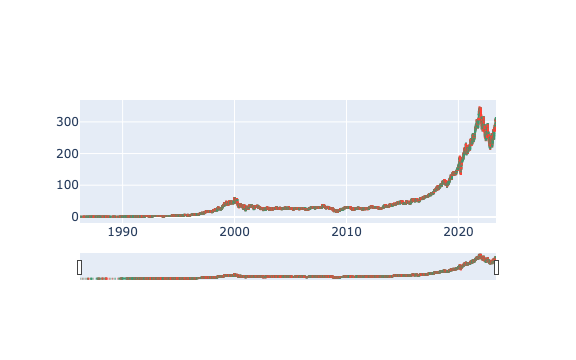

In [65]:
df = df_MSFT

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

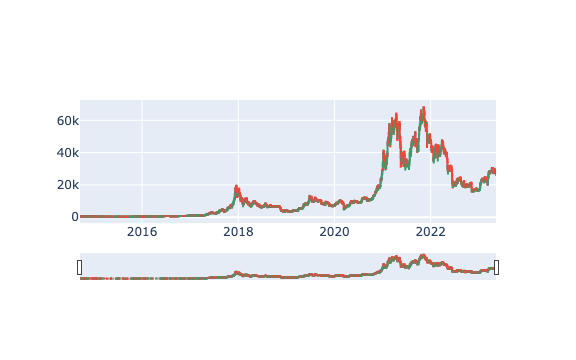

In [66]:
df = df_BTC

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Export the data

### Microsoft data

#### Drop `Adj Close`

- To not confuse the `Close` and `Adj Close`

In [67]:
df_MSFT = df_MSFT.drop(columns='Adj Close')

#### To Excel

In [ ]:
df_MSFT.to_excel('data/Microsoft_Stock_Price_Historical_Daily.xlsx')

#### To CSV

- Less size in memory

In [ ]:
df_MSFT.to_csv('data/Microsoft_Stock_Price_Historical_Daily.csv')

### Bitcoin data altogether

#### Define ticker

In [80]:
ticker = 'BTC-USD'
ticker

'BTC-USD'

#### Download OLHVC

In [82]:
df_ticker = yf.download(ticker, multi_level_index=False, auto_adjust=False)
df_ticker

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
...,...,...,...,...,...,...
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26990.148438,27054.158203,26178.617188,26276.955078,26276.955078,19123081216


#### Create file path

In [79]:
file_path = f'data/{ticker}.xlsx'
file_path

'data/BTC-USD.xlsx'

#### Export to Excel

In [79]:
df_ticker.to_excel(file_path)

'data/BTC-USD.xlsx'

#### Export to CSV

In [79]:
df_ticker.to_excel(f'data/{ticker}.csv')

'data/BTC-USD.xlsx'

#### Snippet

In [79]:
ticker = 'BTC-USD'
df_ticker = yf.download(ticker, multi_level_index=False, auto_adjust=False)
df_ticker.to_excel(f'data/{ticker}.xlsx')
df_ticker.to_excel(f'data/{ticker}.csv')

## [ ] Data Preprocessing

In [ ]:
???

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,-1.549143,DOWN
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,-0.321692,DOWN
...,...,...,...,...,...,...,...
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,-1.751806,DOWN
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,-3.895731,DOWN


### Load the data

In [51]:
import pandas as pd

df_microsoft = pd.read_excel(
    'data/Microsoft_Stock_Price_Historical_Daily.xlsx',
    parse_dates=['Date'], index_col=0
)

df_microsoft

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.055241,0.063365,0.055241,0.060657,1031788800
1986-03-14,0.060657,0.063907,0.060657,0.062823,308160000
...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800


### Filter the data

![](src/Microsoft_x_LinkedIn.png)

In [17]:
df_microsoft_linkedin= df_microsoft.loc['2016-12-08':,:].copy()

## Create new columns

### Tomorrow's percentage change

In [18]:
df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1

In [19]:
df_microsoft_linkedin

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692
...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,3.895731
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,NaN


In [20]:
df_microsoft_linkedin = df_microsoft_linkedin.dropna().copy()

### Did the stock go up or down?

In [21]:
import numpy as np

In [22]:
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(
    df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')

In [23]:
df_microsoft_linkedin.change_tomorrow_direction.value_counts()

UP      849
DOWN    727
Name: change_tomorrow_direction, dtype: int64

<Axes: xlabel='Date'>

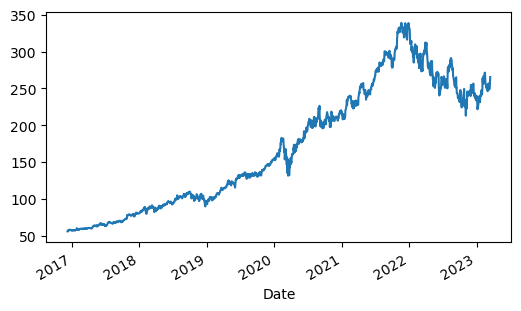

In [24]:
df_microsoft_linkedin.Close.plot()

## Export preprocessed DataFrame into an Excel

In [25]:
df_microsoft_linkedin.to_excel('data/Microsoft_LinkedIn_Processed.xlsx')